# Matrix Profile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from distancematrix import AnytimeCalculator
from distancematrix.consumer import MatrixProfileLR
from distancematrix.generator import ZNormEuclidean
from distancematrix.generator import Euclidean
from distancematrix.insights import highest_value_idxs, lowest_value_idxs

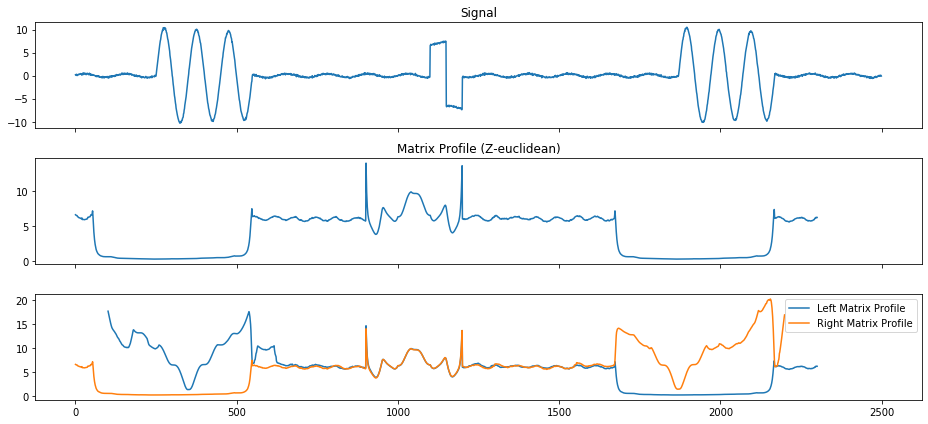

In [2]:
# Create data baseline (the noisy sinusoid allows us to demonstrate motifs and discords together)
rand = np.random.RandomState(0)
data = rand.normal(size=2500) * 0.1
x = np.linspace(0, 40*np.pi, len(data))
y = np.sin(x)*0.4
data += y

# Create some artefacts in the data
x = np.linspace(0, 6*np.pi, 300)
y = np.sin(x) * 10
data[250:550] += y
offset = 20
data[1850+offset:2150+offset] += y
data[1100:1150] += 7
data[1150:1200] -= 7

m = 200  # Subsequence length
calc = AnytimeCalculator(m, data)
calc.add_generator(0, ZNormEuclidean())
mp_cons_zeucl = calc.add_consumer([0], MatrixProfileLR())
calc.calculate_columns()
mp_zeucl = mp_cons_zeucl.matrix_profile()

fig, axs = plt.subplots(3, figsize=(13, 6), sharex=True)
axs[0].set_title("Signal")
axs[0].plot(data)
axs[1].set_title("Matrix Profile (Z-euclidean)")
axs[1].plot(mp_zeucl)
axs[2].plot(mp_cons_zeucl.matrix_profile_left, label="Left Matrix Profile")
axs[2].plot(mp_cons_zeucl.matrix_profile_right, label="Right Matrix Profile")
axs[2].legend()

plt.tight_layout()

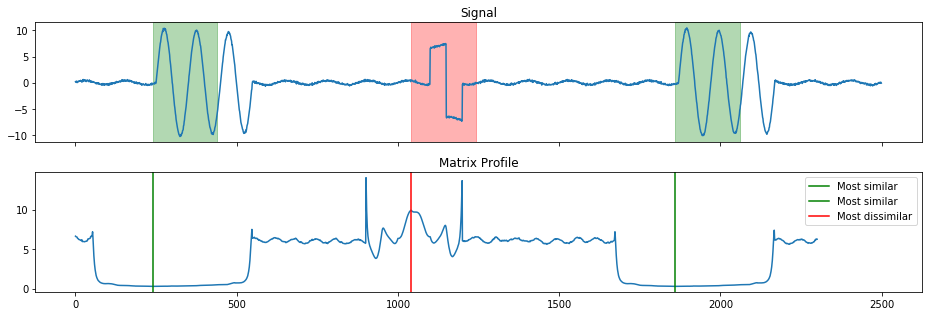

In [3]:
good_matches = list(itertools.islice(lowest_value_idxs(mp_zeucl, m//2), 2))
bad_matches = list(itertools.islice(highest_value_idxs(mp_zeucl, m//2), 3))

fig, axs = plt.subplots(2, figsize=(13,4.5), sharex=True)
axs[0].plot(data)
axs[1].plot(mp_zeucl)
axs[0].set_title("Signal")
axs[1].set_title("Matrix Profile")

for i in good_matches:
    axs[0].axvspan(i, i+m, color="green", alpha=0.3)
    axs[1].axvline(i, color="green", label="Most similar")
    
for i in bad_matches[2:]: # Skip 2 worst matches for visual clarity
    axs[0].axvspan(i, i+m, color="red", alpha=0.3)
    axs[1].axvline(i, color="red", label="Most dissimilar")

plt.legend()
plt.tight_layout()